In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

from plotly.subplots import make_subplots
from scipy.stats import skew, kurtosis

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/TV_Market_Analysis/data/raw/updated_tv_data_final.csv')

In [4]:
df.head()

,Name,Brand,Model,Inches,Price,Price_Category,DisplayType,Resolution,Colour,Width,Height,PPI,Original_Brand
0,oneplus y1s 40 inch (101 cm) led full hd tv,Oneplus,y1s 4,40,18990,Affordable,Full HD,1920x1080,Black,1920,1080,55.07,oneplus
1,tcl 32s5403af 32 inch (81 cm) led full hd tv,Tcl,32s5403af 3,32,13990,Affordable,Full HD,1920x1080,Black,1920,1080,68.84,tcl
2,tcl 32s5400a 32 inch (81 cm) led hd-ready tv,Tcl,32s5400a 3,32,9990,Budget,HD-Ready,1366x768,Black,1366,768,48.97,tcl
3,sony bravia kd-65x74l 65 inch (165 cm) led 4k tv,Sony,bravia kd-65x74l 6,65,74990,High-end,4K,3840x2160,Black,3840,2160,67.78,sony
4,sony bravia kd-43x74k 43 inch (109 cm) led 4k tv,Sony,bravia kd-43x74k 4,43,39990,Mid-range,4K,3840x2160,Black,3840,2160,102.46,sony


Next, let's perform some basic exploratory data analysis (EDA) to understand the structure and content of the dataset better. We will start with summarizing the dataset, including checking for missing values and understanding the distribution of numerical features.

In [5]:
# Display summary statistics for numerical features
df.describe()

# Check for missing values
df.isnull().sum()


Name              0
Brand             0
Model             0
Inches            0
Price             0
Price_Category    0
DisplayType       0
Resolution        0
Colour            0
Width             0
Height            0
PPI               0
Original_Brand    0
dtype: int64

In [6]:
# Set display options to show float values in a more readable format
pd.set_option('display.float_format', '{:.2f}'.format)

# Display summary statistics for numerical features
df.describe()


,Inches,Price,Width,Height,PPI
count,1061.00,1061.00,1061.00,1061.00,1061.00
mean,51.41,89344.21,3246.77,1827.56,72.05
std,14.64,168164.64,1178.23,664.22,18.99
min,24.00,5190.00,1366.00,768.00,36.44
25%,43.00,22990.00,1920.00,1080.00,51.83
50%,50.00,40990.00,3840.00,2160.00,67.78
75%,65.00,82960.00,3840.00,2160.00,80.11
max,98.00,1999990.00,7680.00,4320.00,137.68


In [7]:

# Change the PPI values at row 265 and 1027
df.at[265, 'PPI'] = 58.74
df.at[1027, 'PPI'] = 102.46

# Display the modified rows to confirm the changes
df.loc[[265, 1027], ['PPI']]


,PPI
265,58.74
1027,102.46


Next, let's proceed with visualizing the distribution of some key numerical features using histograms.



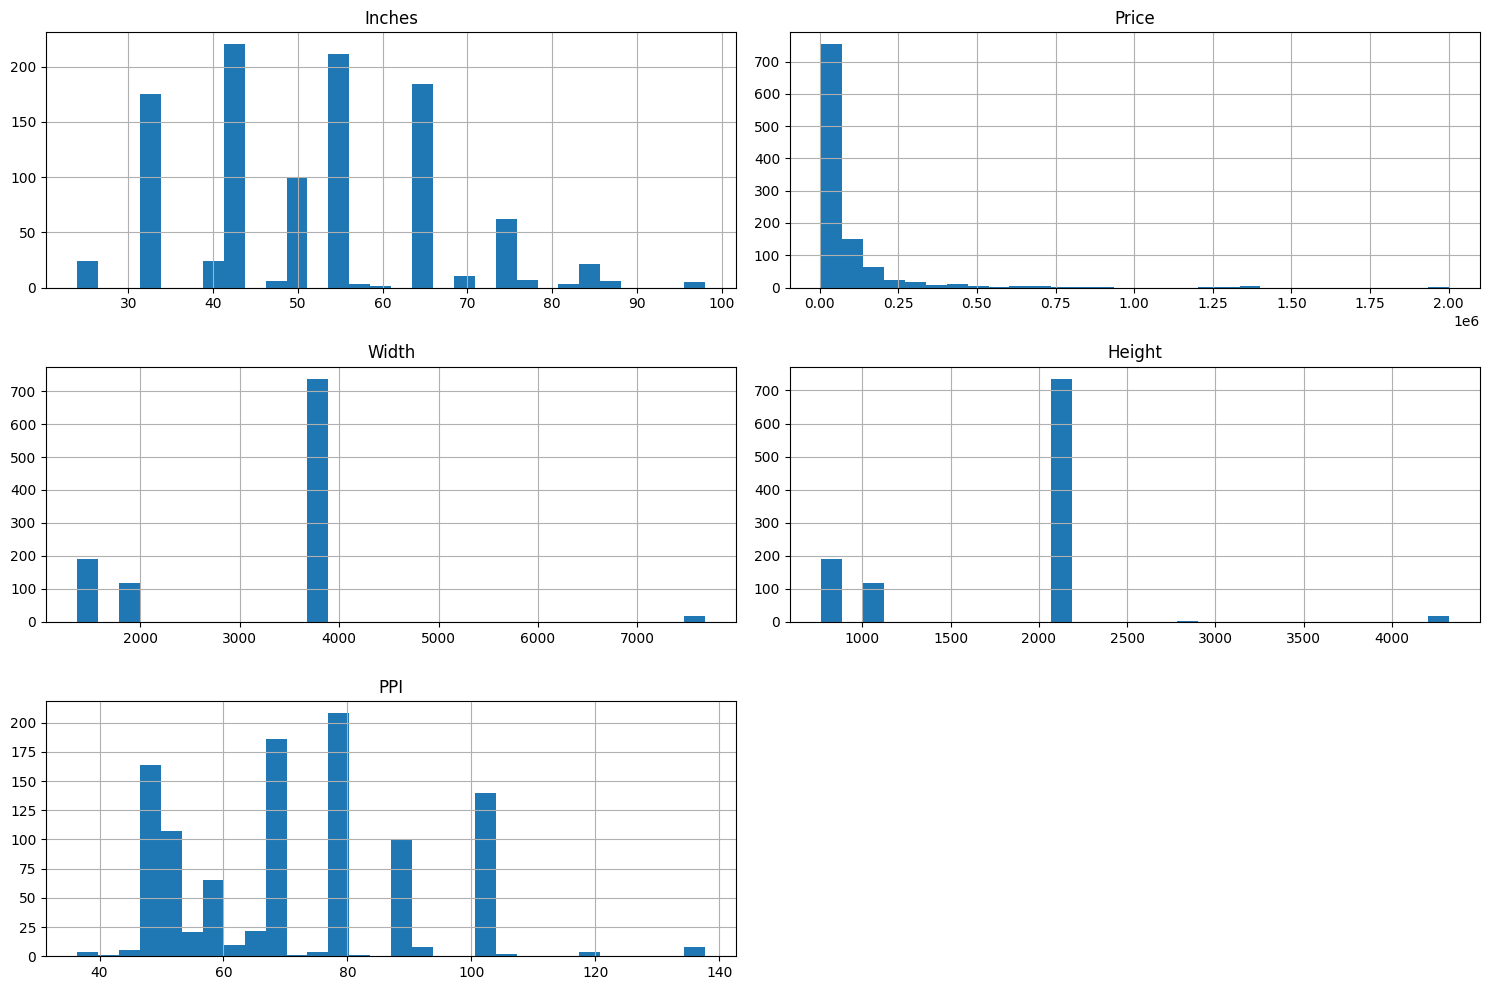

In [8]:
# Plot histograms for numerical features
numerical_features = ['Inches', 'Price', 'Width', 'Height', 'PPI']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1061 non-null   object 
 1   Brand           1061 non-null   object 
 2   Model           1061 non-null   object 
 3   Inches          1061 non-null   int64  
 4   Price           1061 non-null   int64  
 5   Price_Category  1061 non-null   object 
 6   DisplayType     1061 non-null   object 
 7   Resolution      1061 non-null   object 
 8   Colour          1061 non-null   object 
 9   Width           1061 non-null   int64  
 10  Height          1061 non-null   int64  
 11  PPI             1061 non-null   float64
 12  Original_Brand  1061 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 107.9+ KB


In [10]:
# Convert the relevant columns to category dtype
categorical_columns = ['Brand', 'Model', 'Price_Category', 'DisplayType', 'Resolution', 'Colour', 'Original_Brand']

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Display the info to confirm the changes
df_info_after_conversion = df.info()
df_info_after_conversion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Name            1061 non-null   object  
 1   Brand           1061 non-null   category
 2   Model           1061 non-null   category
 3   Inches          1061 non-null   int64   
 4   Price           1061 non-null   int64   
 5   Price_Category  1061 non-null   category
 6   DisplayType     1061 non-null   category
 7   Resolution      1061 non-null   category
 8   Colour          1061 non-null   category
 9   Width           1061 non-null   int64   
 10  Height          1061 non-null   int64   
 11  PPI             1061 non-null   float64 
 12  Original_Brand  1061 non-null   category
dtypes: category(7), float64(1), int64(4), object(1)
memory usage: 106.0+ KB


In [11]:
# Drop the 'Width' and 'Height' columns
df = df.drop(columns=['Width', 'Height'])

# Display the info to confirm the changes
df_info_after_dropping = df.info()
df_info_after_dropping


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Name            1061 non-null   object  
 1   Brand           1061 non-null   category
 2   Model           1061 non-null   category
 3   Inches          1061 non-null   int64   
 4   Price           1061 non-null   int64   
 5   Price_Category  1061 non-null   category
 6   DisplayType     1061 non-null   category
 7   Resolution      1061 non-null   category
 8   Colour          1061 non-null   category
 9   PPI             1061 non-null   float64 
 10  Original_Brand  1061 non-null   category
dtypes: category(7), float64(1), int64(2), object(1)
memory usage: 89.4+ KB


In [12]:
df.head()

,Name,Brand,Model,Inches,Price,Price_Category,DisplayType,Resolution,Colour,PPI,Original_Brand
0,oneplus y1s 40 inch (101 cm) led full hd tv,Oneplus,y1s 4,40,18990,Affordable,Full HD,1920x1080,Black,55.07,oneplus
1,tcl 32s5403af 32 inch (81 cm) led full hd tv,Tcl,32s5403af 3,32,13990,Affordable,Full HD,1920x1080,Black,68.84,tcl
2,tcl 32s5400a 32 inch (81 cm) led hd-ready tv,Tcl,32s5400a 3,32,9990,Budget,HD-Ready,1366x768,Black,48.97,tcl
3,sony bravia kd-65x74l 65 inch (165 cm) led 4k tv,Sony,bravia kd-65x74l 6,65,74990,High-end,4K,3840x2160,Black,67.78,sony
4,sony bravia kd-43x74k 43 inch (109 cm) led 4k tv,Sony,bravia kd-43x74k 4,43,39990,Mid-range,4K,3840x2160,Black,102.46,sony


In [13]:
# Drop the 'Resolution', 'Name', and 'Colour' columns
df = df.drop(columns=['Resolution', 'Name', 'Colour'])

# Display the info to confirm the changes
df_info_after_removal = df.info()
df_info_after_removal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Brand           1061 non-null   category
 1   Model           1061 non-null   category
 2   Inches          1061 non-null   int64   
 3   Price           1061 non-null   int64   
 4   Price_Category  1061 non-null   category
 5   DisplayType     1061 non-null   category
 6   PPI             1061 non-null   float64 
 7   Original_Brand  1061 non-null   category
dtypes: category(5), float64(1), int64(2)
memory usage: 77.4 KB


Univariate analysis involves analyzing the distribution of a single variable.

Let's start with the Price column. We'll examine its distribution, summary statistics, and create a histogram to visualize its distribution.


Here are the steps we'll take:

Summary Statistics: Calculate the summary statistics for the Price column.

Histogram: Create a histogram to visualize the distribution of the Price column.

In [14]:
# Calculate summary statistics for the Price column
price_summary = df['Price'].describe()
price_summary


count      1061.00
mean      89344.21
std      168164.64
min        5190.00
25%       22990.00
50%       40990.00
75%       82960.00
max     1999990.00
Name: Price, dtype: float64

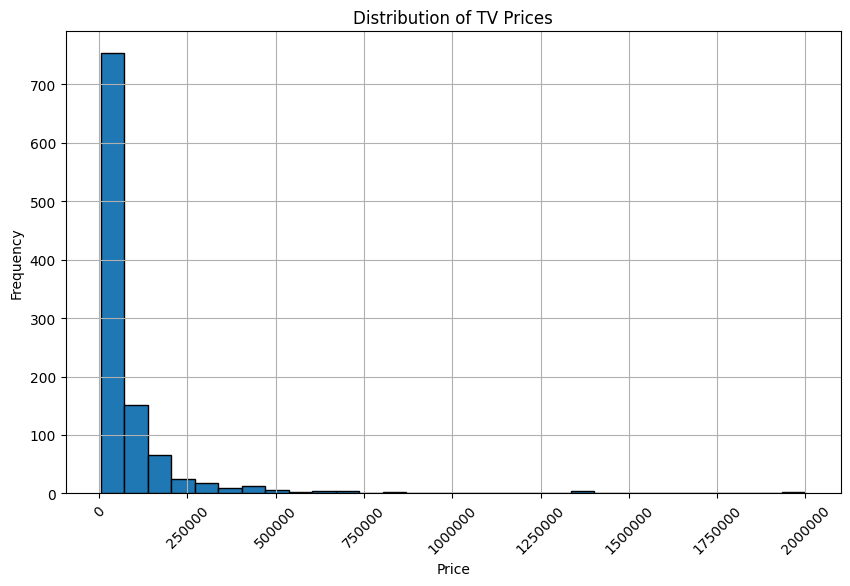

In [15]:
# Create a histogram for the Price column with original price values on the x-axis
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of TV Prices')
plt.grid(True)

# Format the x-axis to display original price values
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

plt.show()


Histogram Explanation:

X-Axis (Price): This axis represents the price of the TVs. The values range from the minimum price of around 5,190 to the maximum price of around 1,999,990. The axis is now formatted to display these prices clearly.

Y-Axis (Frequency): This axis represents the frequency or count of TVs that fall within each price range (bin). Each bin represents a specific price range, and the height of the bar indicates how many TVs fall into that range.

Key Observations:

Distribution Shape:

The histogram is right-skewed, meaning there are more TVs with lower prices and fewer TVs with higher prices.

Most TVs are priced below 200,000, with a sharp decline in frequency as prices increase beyond this point.

Concentration of Prices:

A large concentration of TVs is seen in the lower price ranges (below 50,000), indicating that most TVs in the dataset are relatively affordable.
There are fewer TVs in the mid to high price ranges (100,000 to 1,999,990).

Outliers:

The presence of very high prices (e.g., close to 2,000,000) indicates a few premium or high-end TVs. These outliers are less frequent but significantly impact the overall price distribution.

In [16]:

# Calculate skewness and kurtosis for the Price column
price_skewness = skew(df['Price'])
price_kurtosis = kurtosis(df['Price'])

price_skewness, price_kurtosis


(6.029642849134486, 48.7866138549226)

Interpretation:

Skewness: A skewness value of 6.03 indicates a high level of positive skewness. This means the distribution has a long right tail, with a significant number of high-price outliers.

Kurtosis: A kurtosis value of 48.79 indicates a very peaked distribution with heavy tails, suggesting a high presence of outliers.

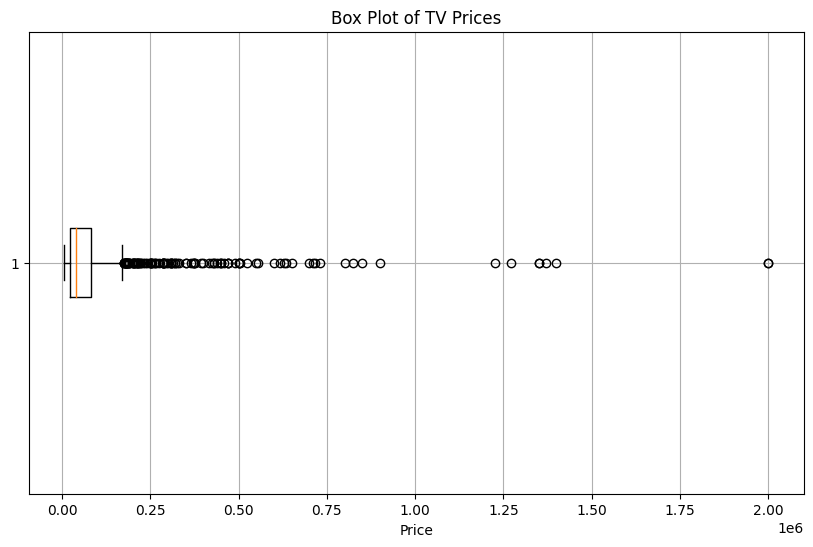

In [17]:
# Create a box plot for the Price column to identify outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'], vert=False)
plt.xlabel('Price')
plt.title('Box Plot of TV Prices')
plt.grid(True)
plt.show()


In [18]:
# Calculate the IQR for the Price column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outlier_threshold_upper = Q3 + 1.5 * IQR
outlier_threshold_lower = Q1 - 1.5 * IQR
outliers = df[(df['Price'] > outlier_threshold_upper) | (df['Price'] < outlier_threshold_lower)]

outlier_threshold_upper, outlier_threshold_lower, outliers.head()


(172915.0,
 -66965.0,
        Brand               Model  Inches   Price Price_Category  DisplayType  \
 93   Samsung       qa55qn90bak 5      55  184990        Premium      QLED 4K   
 99      Sony  bravia xr-55a80l 5      55  180490        Premium           4K   
 100     Sony  bravia xr-77a80l 7      77  446490         Luxury           4K   
 102  Samsung       qa65qn800ck 6      65  364990         Luxury  QLED 8K UHD   
 103  Samsung       qa75qn800bk 7      75  799990         Luxury  QLED 8K UHD   
 
        PPI Original_Brand  
 93   80.11        samsung  
 99   80.11           sony  
 100  57.22           sony  
 102 135.56        samsung  
 103 117.49        samsung  )

In [19]:
# Create the outlier_flag column
df['outlier_flag'] = 0
df.loc[(df['Price'] > outlier_threshold_upper) | (df['Price'] < outlier_threshold_lower), 'outlier_flag'] = 1

# Display the first few rows to confirm the new column
df.head()


,Brand,Model,Inches,Price,Price_Category,DisplayType,PPI,Original_Brand,outlier_flag
0,Oneplus,y1s 4,40,18990,Affordable,Full HD,55.07,oneplus,0
1,Tcl,32s5403af 3,32,13990,Affordable,Full HD,68.84,tcl,0
2,Tcl,32s5400a 3,32,9990,Budget,HD-Ready,48.97,tcl,0
3,Sony,bravia kd-65x74l 6,65,74990,High-end,4K,67.78,sony,0
4,Sony,bravia kd-43x74k 4,43,39990,Mid-range,4K,102.46,sony,0


In [20]:
# Calculate the percentage of outliers for each brand
outlier_counts = df[df['outlier_flag'] == 1]['Brand'].value_counts()
total_counts = df['Brand'].value_counts()
outlier_percentage = (outlier_counts / total_counts) * 100

# Display the outlier percentages
outlier_percentage


Brand
Acer         0.00
Adsun        0.00
Aisen        0.00
Aiwa         0.00
Akai         0.00
Amstrad      0.00
Beethosol    0.00
Blaupunkt    0.00
Bpl          0.00
Bush         0.00
Candy        0.00
Cellecor     0.00
Compaq       0.00
Cooaa        0.00
Cornea       0.00
Croma        0.00
Detel        0.00
Dyanora      0.00
Feltron      0.00
Fox-trot     0.00
Foxsky       0.00
Haier        0.00
Hisense      3.70
Hyundai      0.00
Iffalcon     0.00
Imee         0.00
Impex        0.00
Infinix      0.00
Innoq        0.00
Itel         0.00
Jvc          0.00
Kevin        0.00
Kodak        0.00
Lg          13.25
Lloyd        0.00
Marq         0.00
Micromax     0.00
Motorola     0.00
Nokia        0.00
Nu           0.00
Oneplus      0.00
Onida        0.00
Panasonic    6.06
Philips      0.00
Power        0.00
Realme       0.00
Reliance     0.00
Salora       0.00
Samsung     31.90
Sansui       5.88
Sens         0.00
Sharp        0.00
Sony        21.67
T-series     0.00
Tcl          5.48
Thom

In [21]:
# Filter out brands with non-zero outlier percentages
outlier_percentage_non_zero = outlier_percentage[outlier_percentage > 0]

outlier_percentage_non_zero


Brand
Hisense      3.70
Lg          13.25
Panasonic    6.06
Samsung     31.90
Sansui       5.88
Sony        21.67
Tcl          5.48
Toshiba      4.35
Name: count, dtype: float64

In [22]:
# Display the value counts of the outlier_flag column
outlier_flag_counts = df['outlier_flag'].value_counts()
outlier_flag_counts


outlier_flag
0    945
1    116
Name: count, dtype: int64

The value counts for the outlier_flag column are as follows:


0 (Not Outlier): 945 entries

1 (Outlier): 116 entries

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Brand           1061 non-null   category
 1   Model           1061 non-null   category
 2   Inches          1061 non-null   int64   
 3   Price           1061 non-null   int64   
 4   Price_Category  1061 non-null   category
 5   DisplayType     1061 non-null   category
 6   PPI             1061 non-null   float64 
 7   Original_Brand  1061 non-null   category
 8   outlier_flag    1061 non-null   int64   
dtypes: category(5), float64(1), int64(3)
memory usage: 85.7 KB


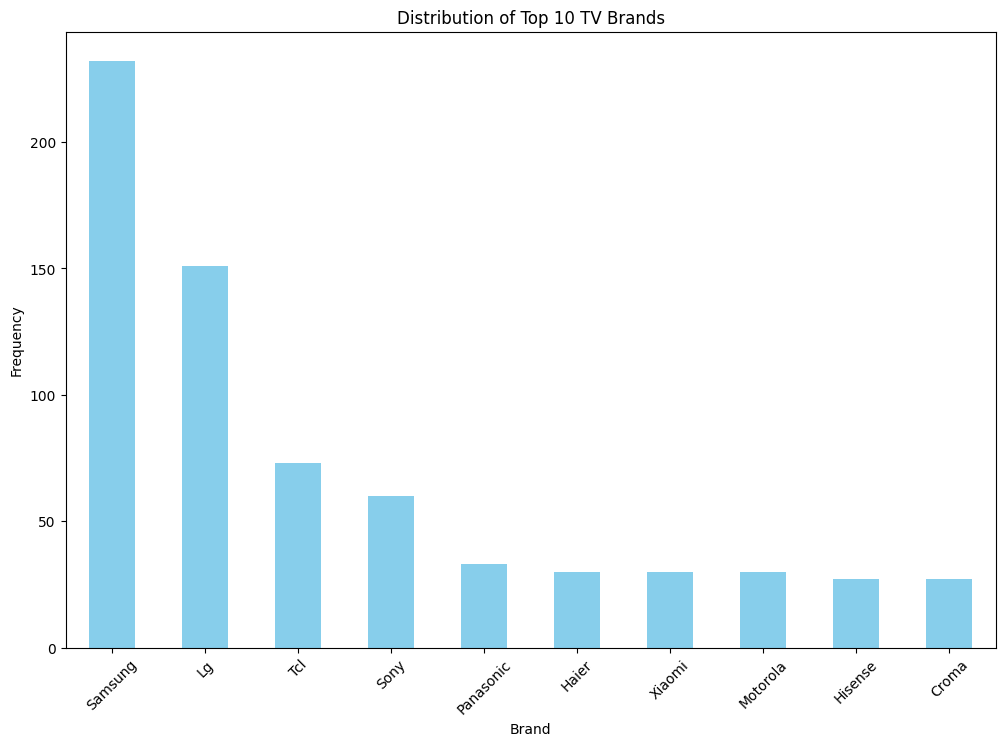

In [24]:
# Get value counts for the 'Brand' column
brand_value_counts = df['Brand'].value_counts()

# Plot the distribution of the top 10 brands
top_10_brands = brand_value_counts.head(10)

plt.figure(figsize=(12, 8))
top_10_brands.plot(kind='bar', color='skyblue')
plt.title('Distribution of Top 10 TV Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



Samsung is the most represented brand in the dataset, with a total of 232 entries.

LG follows as the second most common brand, with 151 entries.

TCL has 73 entries, making it the third most frequent brand.

Sony and Panasonic are also among the top brands, with 60 and 33 entries, respectively.

Other brands in the top 10 include Vizio, Philips, Haier, Hitachi, and Aoc.

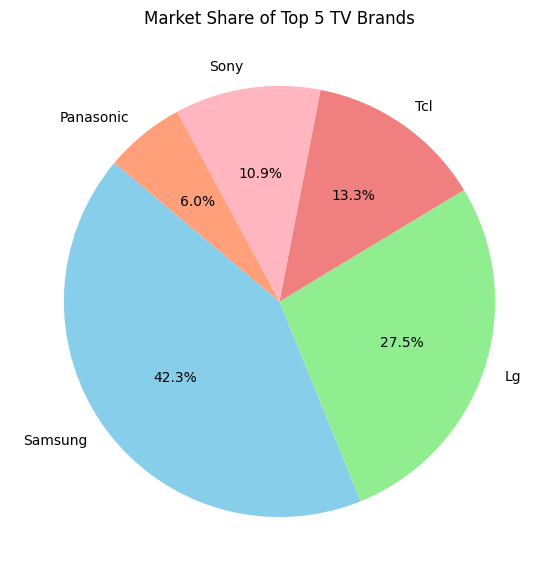

In [25]:
# Plot the pie chart of the top 5 brands
top_5_brands = brand_value_counts.head(5)

plt.figure(figsize=(10, 7))
top_5_brands.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon'])
plt.title('Market Share of Top 5 TV Brands')
plt.ylabel('')  # Hide the y-label for better visualization
plt.show()


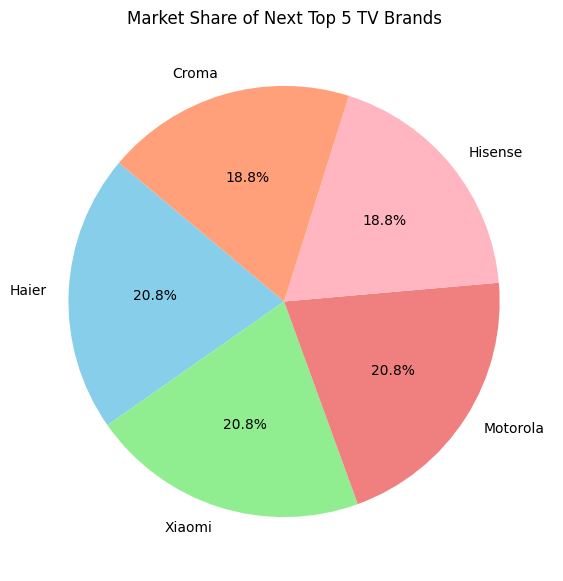

In [26]:
# Plot the pie chart of the next top 5 brands (ranks 6 to 10)
next_top_5_brands = brand_value_counts.iloc[5:10]

plt.figure(figsize=(10, 7))
next_top_5_brands.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon'])
plt.title('Market Share of Next Top 5 TV Brands')
plt.ylabel('')  # Hide the y-label for better visualization
plt.show()


In [27]:
# Data for top 5 brands
top_5_brands = brand_value_counts.head(5)

# Data for next top 5 brands
next_top_5_brands = brand_value_counts.iloc[5:10]

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Top 5 TV Brands", "Next Top 5 TV Brands"), specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# Add pie chart for top 5 brands
fig.add_trace(go.Pie(labels=top_5_brands.index, values=top_5_brands.values, hole=0.3,
                     title="Top 5 TV Brands"), row=1, col=1)

# Add pie chart for next top 5 brands
fig.add_trace(go.Pie(labels=next_top_5_brands.index, values=next_top_5_brands.values, hole=0.3,
                     title="Next Top 5 TV Brands"), row=1, col=2)

# Update layout
fig.update_layout(title_text="Market Share of Top 10 TV Brands",
                  title_x=0.5, title_y=0.95, showlegend=True)

# Show the figure
fig.show()


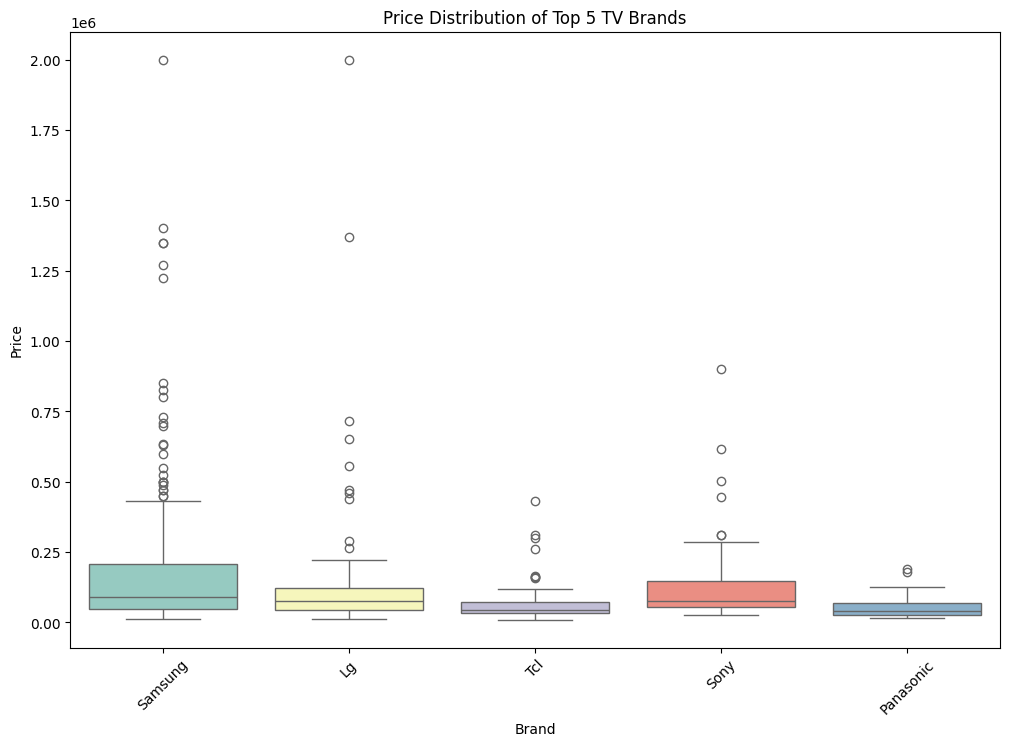

In [28]:
# Filter the dataset for the top 5 brands
top_5_brands_list = top_5_brands.index.tolist()
filtered_data = df[df['Brand'].isin(top_5_brands_list)]

# Ensure the Brand column is treated as a categorical variable with the correct order
filtered_data['Brand'] = pd.Categorical(filtered_data['Brand'], categories=top_5_brands_list, ordered=True)

# Create a box plot for the price distribution of the top 5 brands
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Price', data=filtered_data, palette='Set3')
plt.title('Price Distribution of Top 5 TV Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


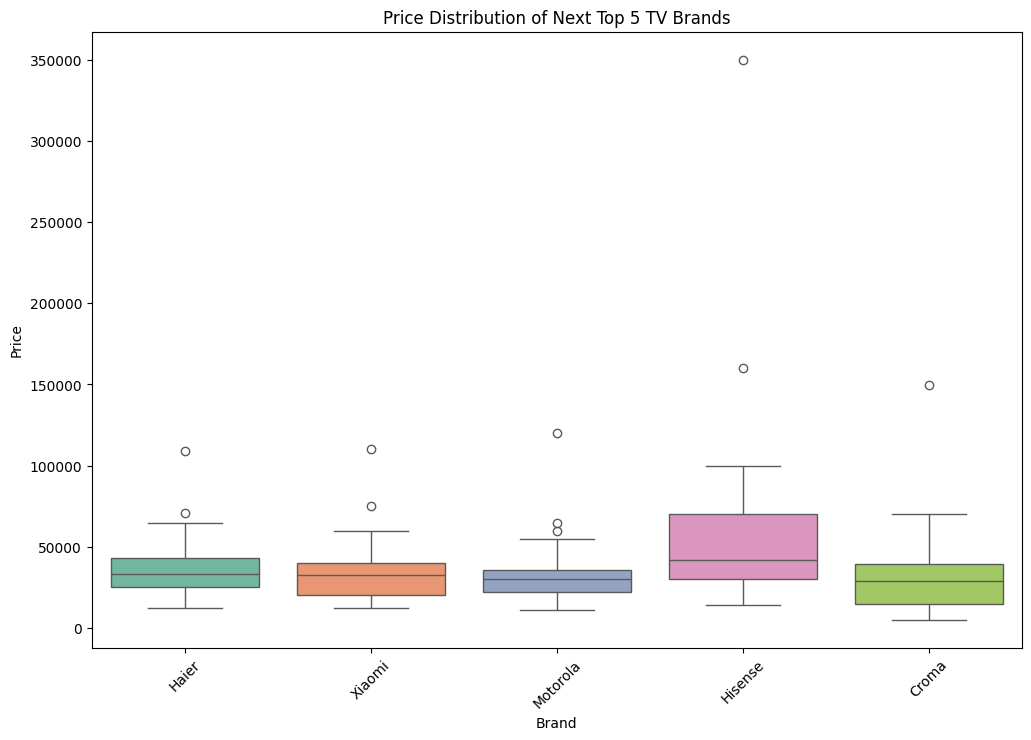

In [29]:
# Filter the dataset for the next top 5 brands
next_top_5_brands_list = next_top_5_brands.index.tolist()
next_filtered_data = df[df['Brand'].isin(next_top_5_brands_list)]

# Ensure the Brand column is treated as a categorical variable with the correct order
next_filtered_data['Brand'] = pd.Categorical(next_filtered_data['Brand'], categories=next_top_5_brands_list, ordered=True)

# Create a box plot for the price distribution of the next top 5 brands
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Price', data=next_filtered_data, palette='Set2')
plt.title('Price Distribution of Next Top 5 TV Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [30]:
# Create a table showing the range values of the price category with rounded values
price_category_ranges_rounded = df.groupby('Price_Category')['Price'].agg(['min', 'max', 'mean', 'median', 'std']).round(2).reset_index()


price_category_ranges_rounded


,Price_Category,min,max,mean,median,std
0,Affordable,10490,29999,19897.49,19244.50,6050.90
1,Budget,5190,9999,7764.12,7999.00,1362.52
2,High-end,60980,99999,78165.44,75990.00,11284.22
3,Luxury,202490,1999990,487911.47,369990.00,362356.97
4,Mid-range,30990,59999,43310.15,41990.00,8368.26
5,Premium,102060,199990,142140.64,140255.00,27873.36


In [31]:
# Get value counts for the 'Price_Category' column
price_category_value_counts = df['Price_Category'].value_counts()
price_category_value_counts


Price_Category
Affordable    314
Mid-range     313
High-end      154
Premium       120
Luxury         93
Budget         67
Name: count, dtype: int64

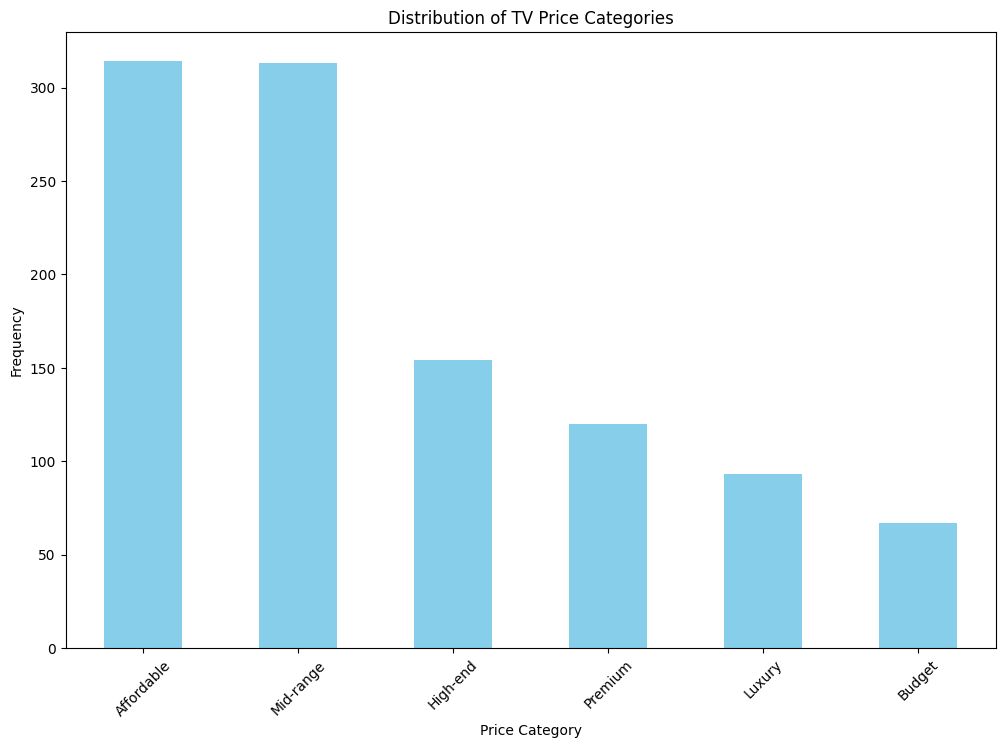

In [32]:
# Plot the distribution of the 'Price_Category' column
plt.figure(figsize=(12, 8))
price_category_value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of TV Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Interpretation:

The Affordable and Mid-range categories are the most common, each with over 300 entries.

High-end and Premium categories follow, with 154 and 120 entries, respectively.
Luxury and Budget categories are the least common.

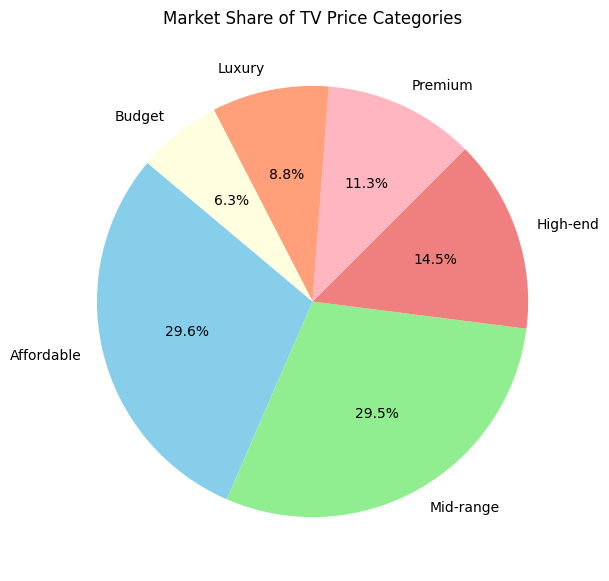

In [33]:
# Plot the pie chart of the price categories
plt.figure(figsize=(10, 7))
price_category_value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightyellow'])
plt.title('Market Share of TV Price Categories')
plt.ylabel('')  # Hide the y-label for better visualization
plt.show()


In [34]:
# Create a crosstab of Brand and Price_Category
brand_price_crosstab = pd.crosstab(df['Brand'], df['Price_Category'])

brand_price_crosstab.head(10)


Price_Category,Affordable,Budget,High-end,Luxury,Mid-range,Premium
Brand,,,,,,
Acer,10,0,3,0,8,0
Adsun,1,6,0,0,0,0
Aisen,1,0,0,0,0,0
Aiwa,5,0,0,0,1,0
Akai,1,1,0,0,1,0
Amstrad,1,0,0,0,1,0
Beethosol,2,6,0,0,1,0
Blaupunkt,13,2,0,0,5,0
Bpl,7,0,0,0,3,0


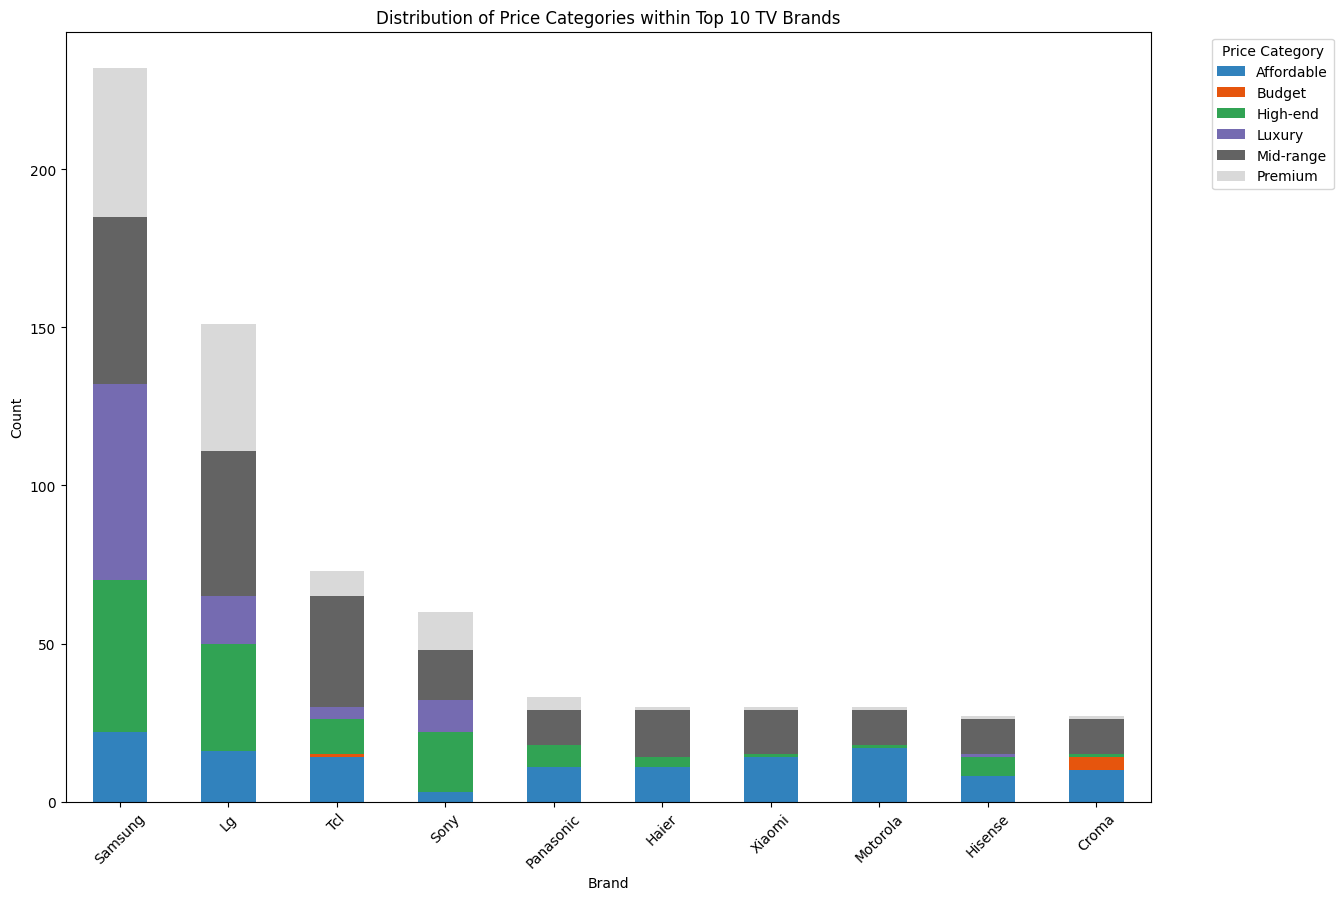

In [35]:
# Select the top 10 brands for visualization
top_10_brands_crosstab = brand_price_crosstab.loc[top_10_brands.index]

# Plot the stacked bar chart
top_10_brands_crosstab.plot(kind='bar', stacked=True, figsize=(14, 10), colormap='tab20c')
plt.title('Distribution of Price Categories within Top 10 TV Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Price Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Key Insights:

Samsung and LG have a diverse range of products across multiple price categories, indicating a broad market strategy.

Sony focuses more on the High-end and Premium segments, targeting higher-income consumers.

TCL, Panasonic, and Vizio are strong in the Affordable and Mid-range segments, catering to budget-conscious consumers.

Haier, Hitachi, and Aoc have more concentrated offerings in the lower price categories.

In [36]:
# Convert the crosstab to a DataFrame suitable for Plotly
top_10_brands_crosstab = brand_price_crosstab.loc[top_10_brands.index].reset_index()
top_10_brands_crosstab_melted = top_10_brands_crosstab.melt(id_vars='Brand', value_vars=top_10_brands_crosstab.columns[1:],
                                                            var_name='Price Category', value_name='Count')

# Create the stacked bar chart
fig = px.bar(top_10_brands_crosstab_melted, x='Brand', y='Count', color='Price Category',
             title='Distribution of Price Categories within Top 10 TV Brands',
             color_discrete_sequence=px.colors.qualitative.T10)

# Update layout for better visualization
fig.update_layout(barmode='stack', xaxis_title='Brand', yaxis_title='Count', legend_title='Price Category',
                  title_x=0.5, title_y=0.95)

# Show the figure
fig.show()


In [37]:
# Get the top 5 most common screen sizes
top_5_inches = df['Inches'].value_counts().head(5)
top_5_inches


Inches
43    212
55    211
65    184
32    175
50     94
Name: count, dtype: int64

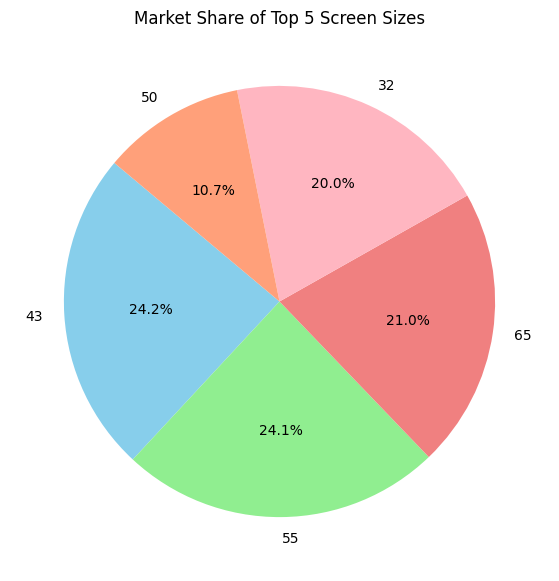

In [38]:
# Plot the pie chart for the top 5 screen sizes
plt.figure(figsize=(10, 7))
top_5_inches.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon'])
plt.title('Market Share of Top 5 Screen Sizes')
plt.ylabel('')  # Hide the y-label for better visualization
plt.show()


Interpretation:

The 43-inch and 55-inch screen sizes have nearly equal market shares, both around 25%.

The 65-inch screen size also has a significant market share at 21.0%.

The 32-inch screen size is popular with a 20.0% share.

The 50-inch screen size has a smaller but notable market share at 10.7%.

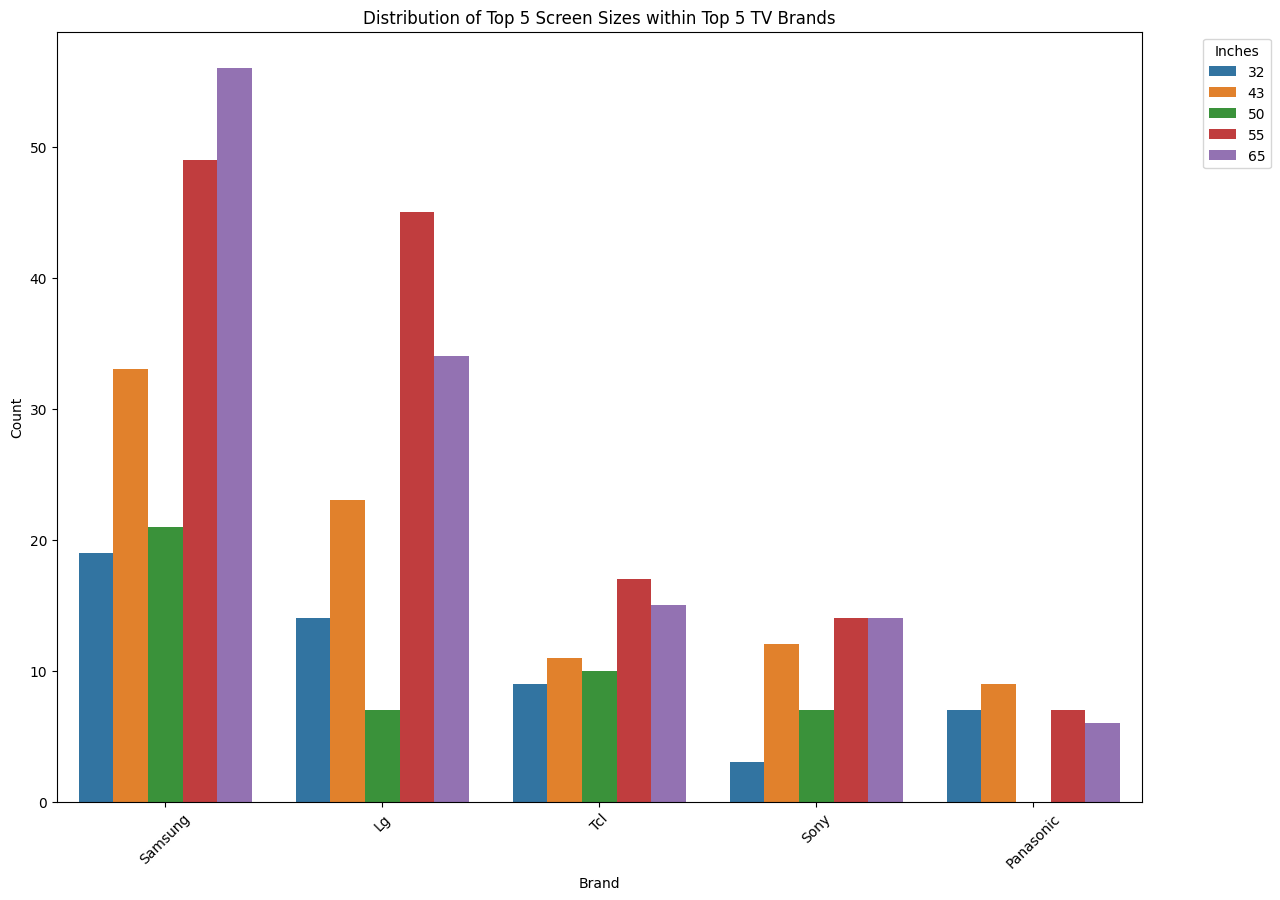

In [39]:
# Filter the dataset for the top 5 brands and top 5 screen sizes
filtered_data_top_brands_inches = df[
    df['Brand'].isin(top_5_brands.index) & df['Inches'].isin(top_5_inches.index)
]
# Ensure the Brand column is treated as a categorical variable with the correct order
filtered_data_top_brands_inches['Brand'] = pd.Categorical(filtered_data_top_brands_inches['Brand'], categories=top_5_brands.index.tolist(), ordered=True)

# Create a stacked bar chart for the top 5 brands and top 5 screen sizes
plt.figure(figsize=(14, 10))
sns.countplot(data=filtered_data_top_brands_inches, x='Brand', hue='Inches', palette='tab10')
plt.title('Distribution of Top 5 Screen Sizes within Top 5 TV Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Inches', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [40]:

# Filter the dataset for the top 5 brands and top 5 screen sizes
filtered_data_top_brands_inches = df[
    df['Brand'].isin(top_5_brands.index) & df['Inches'].isin(top_5_inches.index)
]

# Convert the Brand column to a categorical variable with the correct order
filtered_data_top_brands_inches['Brand'] = pd.Categorical(filtered_data_top_brands_inches['Brand'], categories=top_5_brands.index.tolist(), ordered=True)

# Create the stacked bar chart
fig = px.histogram(filtered_data_top_brands_inches, x='Brand', color='Inches', barmode='stack',
                   title='Distribution of Top 5 Screen Sizes within Top 5 TV Brands',
                   category_orders={'Brand': top_5_brands.index.tolist()},
                   color_discrete_sequence=px.colors.qualitative.T10)

# Update layout for better visualization
fig.update_layout(xaxis_title='Brand', yaxis_title='Count', legend_title='Inches', title_x=0.5, title_y=0.95)

# Show the figure
fig.show()


In [41]:

# Filter the dataset for the top 5 screen sizes
filtered_data_top_inches = df[df['Inches'].isin(top_5_inches.index)]

# Create the stacked bar chart
fig = px.histogram(filtered_data_top_inches, x='Inches', color='Price_Category', barmode='stack',
                   title='Distribution of Price Categories within Top 5 Screen Sizes',
                   category_orders={'Inches': top_5_inches.index.tolist()},
                   color_discrete_sequence=px.colors.qualitative.T10)

# Update layout for better visualization
fig.update_layout(xaxis_title='Screen Size (Inches)', yaxis_title='Count', legend_title='Price Category', title_x=0.5, title_y=0.95)

# Show the figure
fig.show()


In [42]:
# Calculate the correlation coefficient between Price and Inches
correlation_coefficient = df['Price'].corr(df['Inches'])
correlation_coefficient


0.6058835120502739

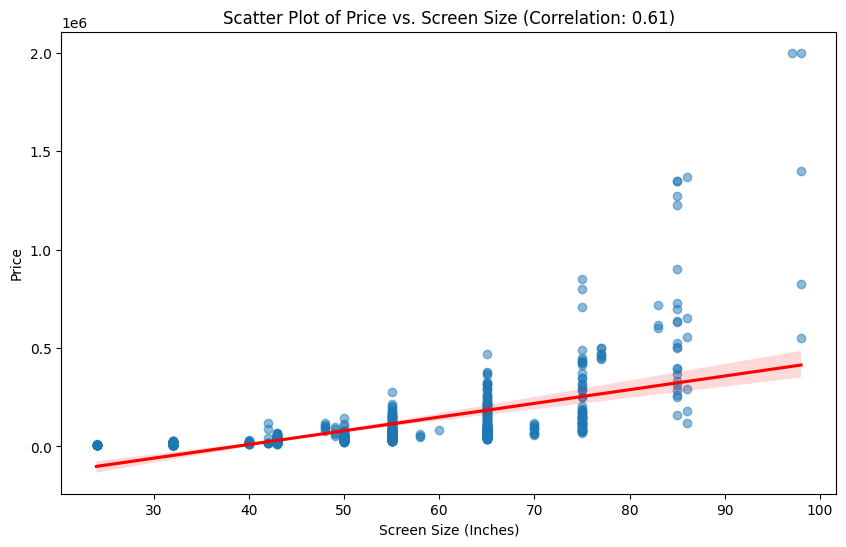

In [43]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Inches', y='Price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Scatter Plot of Price vs. Screen Size (Correlation: {correlation_coefficient:.2f})')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price')
plt.show()


Interpretation:

Positive Correlation: There is a clear positive trend, indicating that larger screen sizes are generally associated with higher prices.

Moderate Strength: The correlation coefficient of approximately 0.61 signifies a moderate positive correlation.

Variability: While there is a positive trend, there is also considerable variability, suggesting other factors may also influence the price.

In [44]:
# Get value counts for the 'DisplayType' column
display_type_value_counts = df['DisplayType'].value_counts()
display_type_value_counts


DisplayType
4K              681
HD-Ready        188
Full HD         118
QLED 4K          26
EVO 4K           15
LED 4K           11
QLED 8K UHD      11
8K UHD            6
Mini LED 4K       4
LED HD-Ready      1
Name: count, dtype: int64

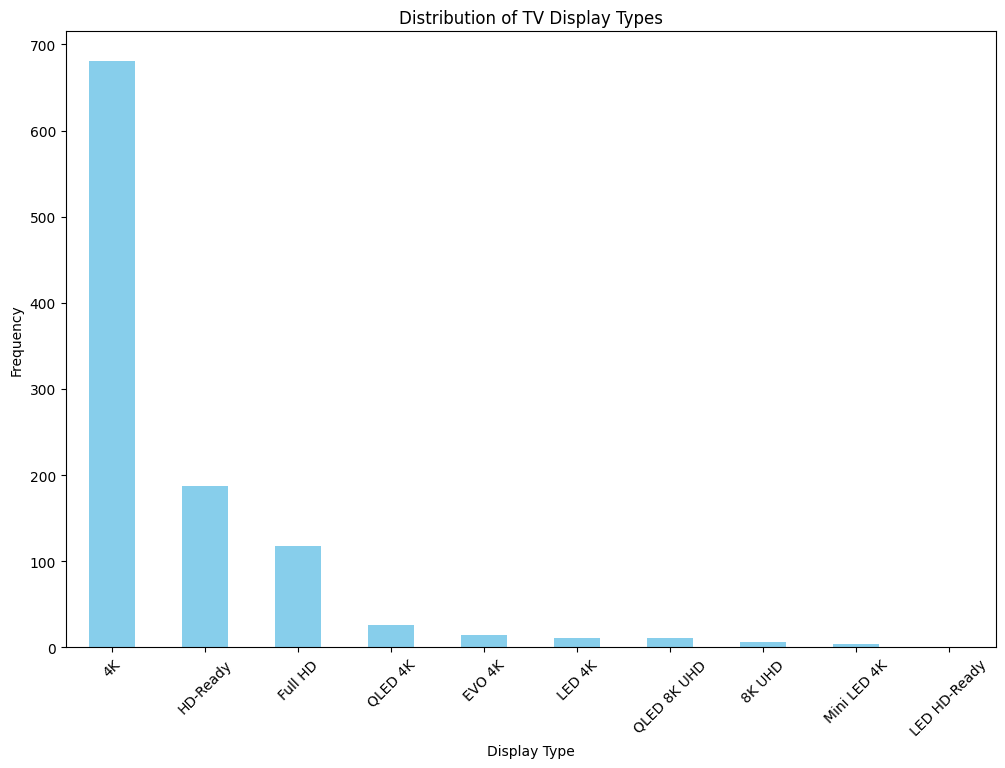

In [45]:
# Plot the distribution of the 'DisplayType' column
plt.figure(figsize=(12, 8))
display_type_value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of TV Display Types')
plt.xlabel('Display Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


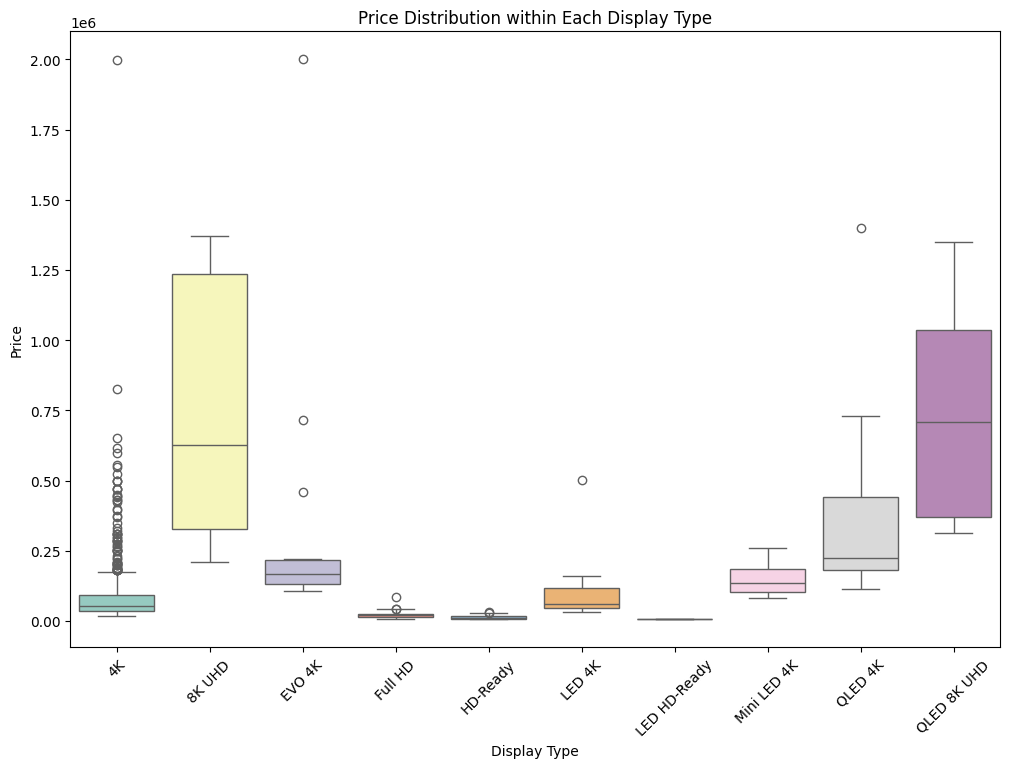

In [46]:
# Create a box plot for the price distribution within each display type
plt.figure(figsize=(12, 8))
sns.boxplot(x='DisplayType', y='Price', data=df, palette='Set3')
plt.title('Price Distribution within Each Display Type')
plt.xlabel('Display Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


Key Insights:

4K is the most common display type and has a wide price range, reflecting its popularity across various price segments.

HD-Ready and Full HD are more budget-friendly display types.

QLED 4K and other advanced display types tend to be more expensive, catering to the high-end market.

In [49]:
# Identify the top 6 brands by frequency
top_brands = df['Brand'].value_counts().head(6).index

top_brands


CategoricalIndex(['Samsung', 'Lg', 'Tcl', 'Sony', 'Panasonic', 'Haier'], categories=['Acer', 'Adsun', 'Aisen', 'Aiwa', ..., 'Vu', 'Xelectron', 'Xiaomi', 'Zebronics'], ordered=False, dtype='category', name='Brand')

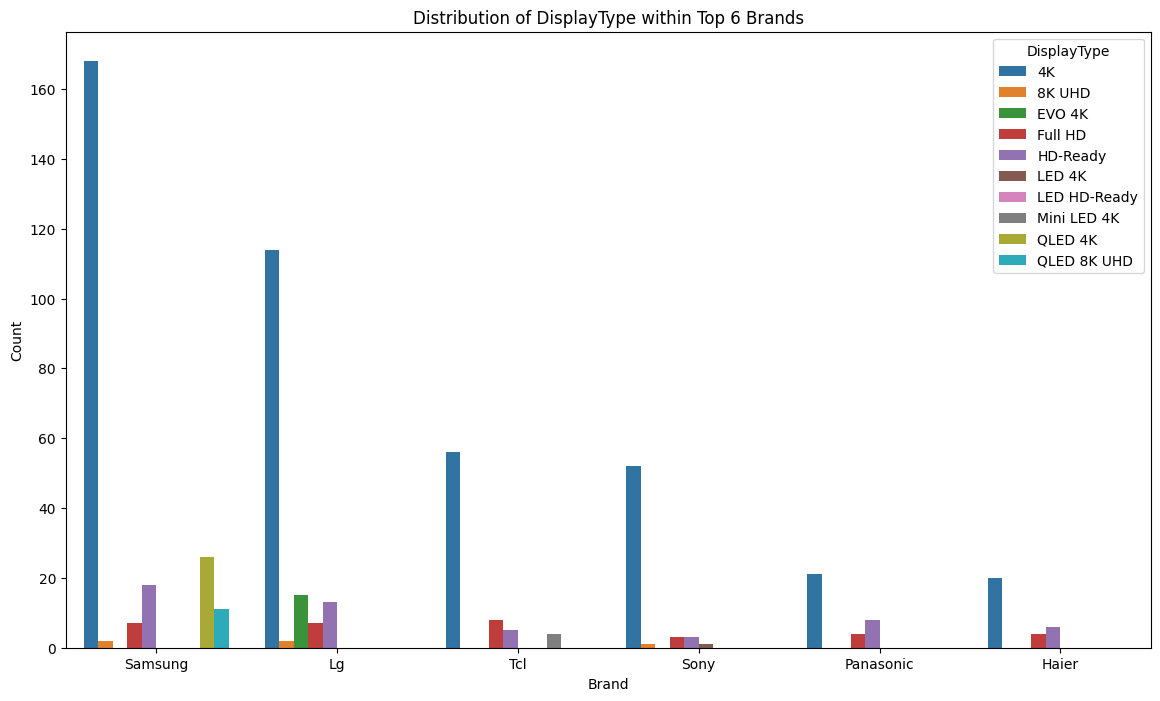

In [50]:
# Filter the dataframe to include only the top 6 brands
df_top_brands = df[df['Brand'].isin(top_brands)]

# Create a count plot to visualize the distribution of DisplayType within the top 6 brands
plt.figure(figsize=(14, 8))
sns.countplot(x='Brand', hue='DisplayType', data=df_top_brands, order=top_brands)
plt.title('Distribution of DisplayType within Top 6 Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='DisplayType')
plt.show()


In [61]:
df.columns

Index(['Brand', 'Model', 'Inches', 'Price', 'Price_Category', 'DisplayType',
       'PPI', 'Original_Brand', 'outlier_flag'],
      dtype='object')

In [63]:
# Remove the 'Original_Brand' column from the dataframe
df = df.drop(columns=['Original_Brand'])

# Verify the column has been removed
df.head()


,Brand,Model,Inches,Price,Price_Category,DisplayType,PPI,outlier_flag
0,Oneplus,y1s 4,40,18990,Affordable,Full HD,55.07,0
1,Tcl,32s5403af 3,32,13990,Affordable,Full HD,68.84,0
2,Tcl,32s5400a 3,32,9990,Budget,HD-Ready,48.97,0
3,Sony,bravia kd-65x74l 6,65,74990,High-end,4K,67.78,0
4,Sony,bravia kd-43x74k 4,43,39990,Mid-range,4K,102.46,0


In [64]:
df.to_csv('tv_cleaned_data.csv', index=False)